In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv('2008.csv')

In [3]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[['Month','ArrDelay']]

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Month       0
ArrDelay    0
dtype: int64

In [13]:
 df['Month'].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
df.sort_values(by = 'Month',ascending=True)

,Month,ArrDelay
0,1,16.0
404103,1,-9.0
404102,1,29.0
404101,1,191.0
404100,1,291.0
...,...,...
1989171,4,4.0
1989172,4,-2.0
1989173,4,-17.0
1989167,4,-5.0


In [17]:
delay_by_month = df.groupby(["Month"]).mean()['ArrDelay'].reset_index()

# the Basic Plot

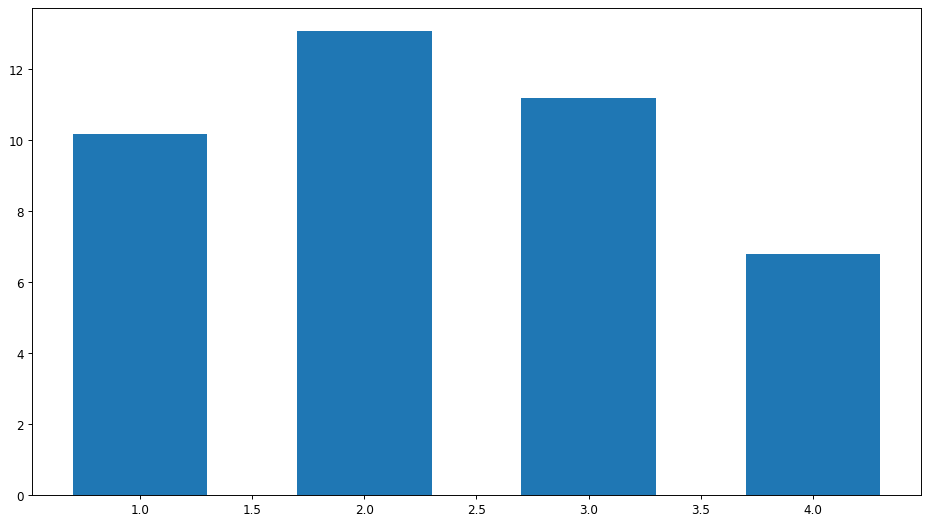

In [25]:
fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
bar1 = ax.bar(delay_by_month["Month"],delay_by_month["ArrDelay"],width = 0.6)

# Lets improve the bar graph

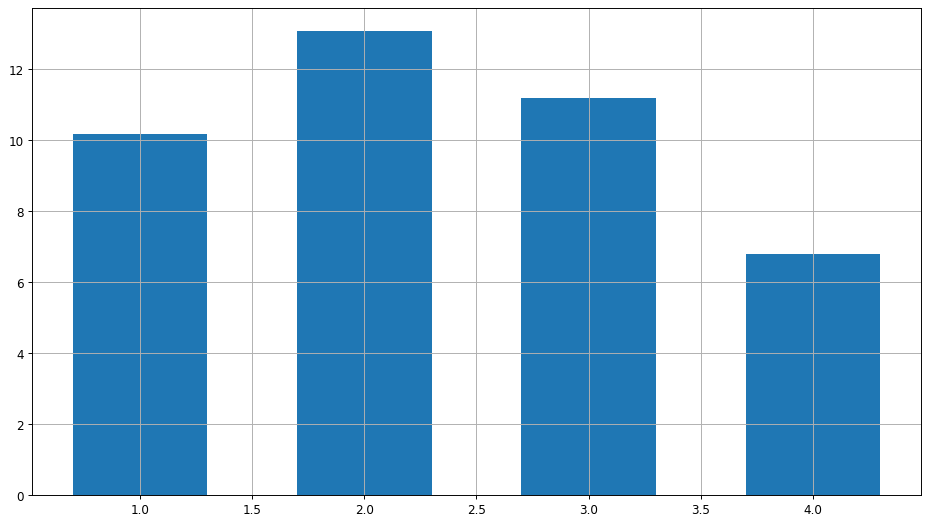

In [33]:
fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
bar1 = ax.bar(delay_by_month["Month"],delay_by_month["ArrDelay"],width = 0.6)
# creating grid
ax.grid()


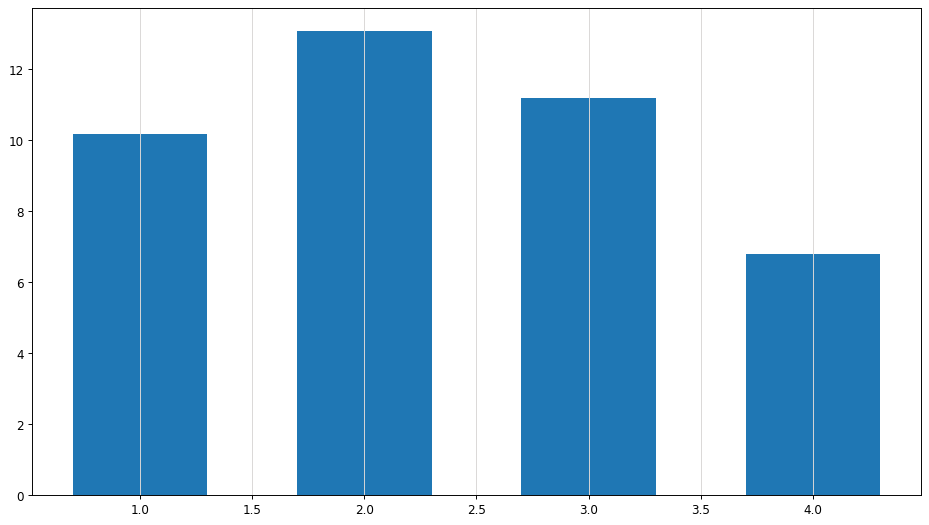

In [35]:
fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
bar1 = ax.bar(delay_by_month["Month"],delay_by_month["ArrDelay"],width = 0.6)
# creating grid
ax.grid(which = 'major',axis = 'x', color ='#DAD8D7')

[Text(0, 3, '10.2'), Text(0, 3, '13.1'), Text(0, 3, '11.2'), Text(0, 3, '6.8')]

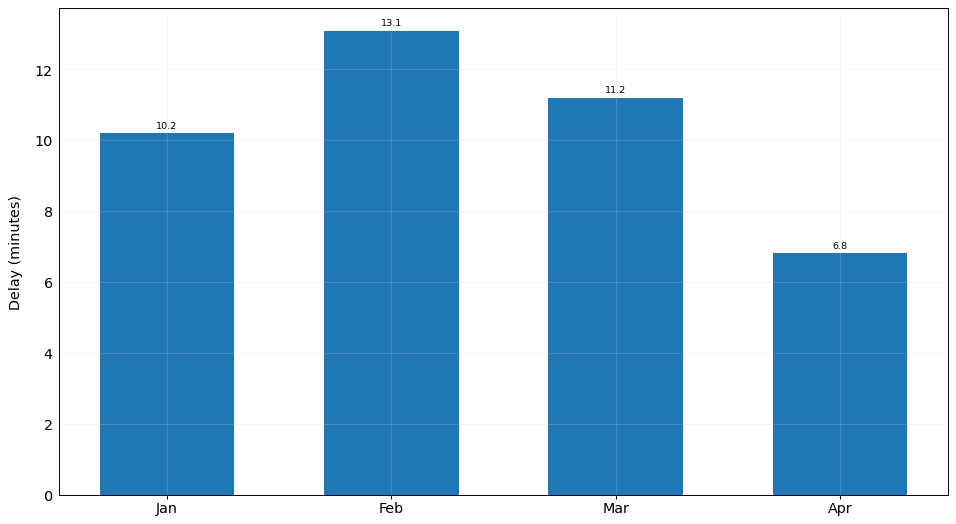

In [77]:
fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
bar1 = ax.bar(delay_by_month["Month"],delay_by_month["ArrDelay"],width = 0.6)
# creating grid
ax.grid(which = 'major',axis = 'x', color ='#DAD8D7',alpha = 0.2, zorder = 1) # 'alpha' is the intensity of the grid lines
ax.grid(which = 'major',axis = 'y', color ='#DAD8D7',alpha = 0.2, zorder = 1)

# Reformat x-axix label and tick labels
ax.set_xlabel('',fontsize = 12,labelpad = 10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_major_formatter(lambda s, i: f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
ax.xaxis.set_tick_params(pad = 2,labelbottom = True, bottom = True,labelsize= 12, labelrotation = 0 )# 'pad' is the distace between the parameters and axis
labels = ['Jan','Feb','Mar','Apr']
ax.set_xticks(delay_by_month["Month"],labels) # Map integer numbers from the series to labels list

# Reformat y-axix label and tick labels
ax.set_ylabel('Delay (minutes)',fontsize = 12,labelpad = 10)
ax.yaxis.set_label_position('left')
ax.yaxis.set_major_formatter(lambda s, i: f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
ax.yaxis.set_tick_params(pad = 2,labeltop = False ,labelbottom = True, bottom = False,labelsize= 12, labelrotation = 0 )

# Add label on top of each bar
ax.bar_label(bar1,labels= [f'{e:,.1f}' for e in delay_by_month['ArrDelay']], padding=3, color = 'black',fontsize=8)




# More improvement in the figure

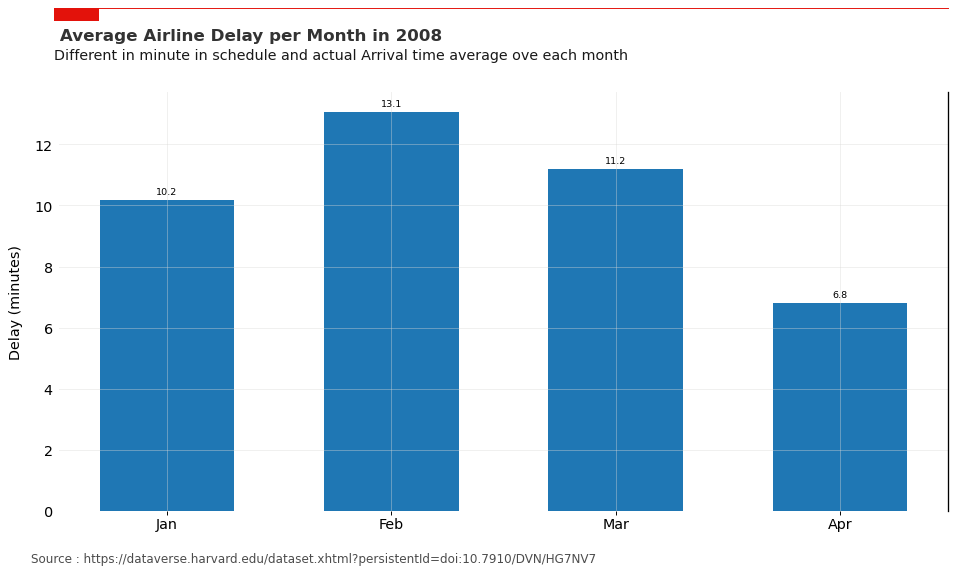

In [112]:
fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
bar1 = ax.bar(delay_by_month["Month"],delay_by_month["ArrDelay"],width = 0.6)
# creating grid
ax.grid(which = 'major',axis = 'x', color ='#DAD8D7',alpha = 0.4, zorder = 1) # 'alpha' is the intensity of the grid lines
ax.grid(which = 'major',axis = 'y', color ='#DAD8D7',alpha = 0.4, zorder = 1)

# Reformat x-axix label and tick labels
ax.set_xlabel('',fontsize = 12,labelpad = 10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_major_formatter(lambda s, i: f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
ax.xaxis.set_tick_params(pad = 2,labelbottom = True, bottom = True,labelsize= 12, labelrotation = 0 )# 'pad' is the distace between the parameters and axis
labels = ['Jan','Feb','Mar','Apr']
ax.set_xticks(delay_by_month["Month"],labels) # Map integer numbers from the series to labels list

# Reformat y-axix label and tick labels
ax.set_ylabel('Delay (minutes)',fontsize = 12,labelpad = 10)
ax.yaxis.set_label_position('left')
ax.yaxis.set_major_formatter(lambda s, i: f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
ax.yaxis.set_tick_params(pad = 2,labeltop = False ,labelbottom = True, bottom = False,labelsize= 12, labelrotation = 0 )

# Add label on top of each bar
ax.bar_label(bar1,labels= [f'{e:,.1f}' for e in delay_by_month['ArrDelay']], padding=3, color = 'black',fontsize=8)




# Remove the spines
ax.spines[['top','bottom','left']].set_visible(False)

#Make the right so=pines more thick
ax.spines['right'].set_linewidth(1.1)

# Add redline and rectangle on top of the figure
ax.plot([0.12,0.9],[0.98,0.98],transform = fig.transFigure, clip_on = False, color = '#E3120B',linewidth = 0.8)
ax.add_patch(plt.Rectangle((0.12,0.98),0.04,-0.02, facecolor = '#E3120B',transform = fig.transFigure,
                           clip_on = False, linewidth = 0))

# Add in title and sub title
ax.text(x = 0.12, y = 0.93, s = " Average Airline Delay per Month in 2008", transform = fig.transFigure,
        ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = "Different in minute in schedule and actual Arrival time average ove each month",
        transform = fig.transFigure,ha = 'left', fontsize = 12, alpha = 0.9)

# Set source of the figure
plt.text(x = 0.1, y = 0.12, s = 'Source : https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7',
        transform = fig.transFigure, ha = 'left',fontsize = 10, alpha = 0.7)

# Adjust the margins arround the plot area
plt.subplots_adjust(left = None, bottom = 0.2,right = None, top = 0.85, wspace=None, hspace= None )

# Set a white background
fig.patch.set_facecolor('white')



# More improvement The color gradient

In [113]:
# Colors - choose the extream colors of the map
colours = ['#2196f3','#bbdefb']

# colormap = Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("color_map",colours, N= 256)
norm = mpl.colors.Normalize(delay_by_month['ArrDelay'].min(),delay_by_month['ArrDelay'].max())

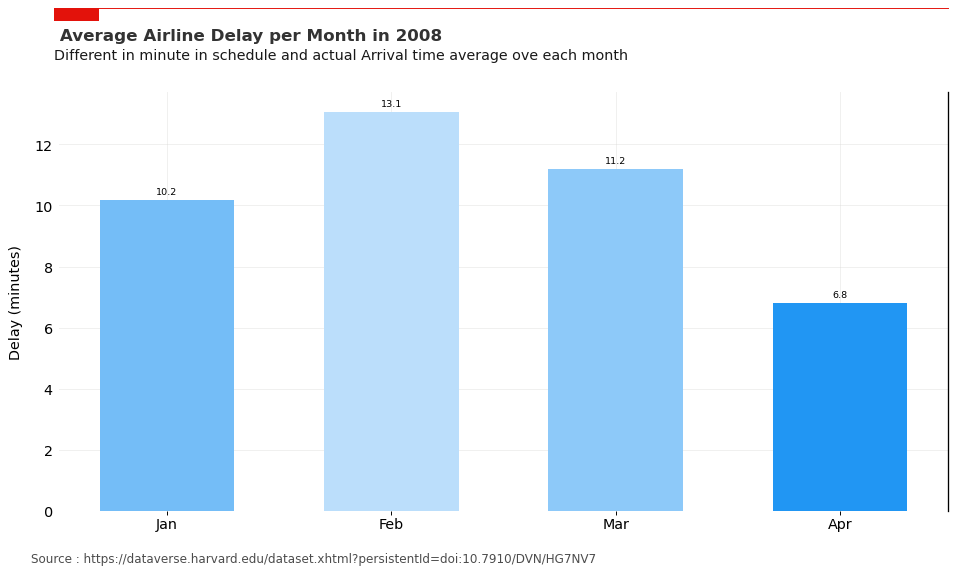

In [115]:
# Colors - choose the extream colors of the map
colours = ['#2196f3','#bbdefb']

# colormap = Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("color_map",colours, N= 256)
norm = mpl.colors.Normalize(delay_by_month['ArrDelay'].min(),delay_by_month['ArrDelay'].max())

fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
bar1 = ax.bar(delay_by_month["Month"],delay_by_month["ArrDelay"],width = 0.6, 
              color = cmap(norm(delay_by_month['ArrDelay'])),zorder = 2)
# creating grid
ax.grid(which = 'major',axis = 'x', color ='#DAD8D7',alpha = 0.4, zorder = 1) # 'alpha' is the intensity of the grid lines
ax.grid(which = 'major',axis = 'y', color ='#DAD8D7',alpha = 0.4, zorder = 1)

# Reformat x-axix label and tick labels
ax.set_xlabel('',fontsize = 12,labelpad = 10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_major_formatter(lambda s, i: f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
ax.xaxis.set_tick_params(pad = 2,labelbottom = True, bottom = True,labelsize= 12, labelrotation = 0 )# 'pad' is the distace between the parameters and axis
labels = ['Jan','Feb','Mar','Apr']
ax.set_xticks(delay_by_month["Month"],labels) # Map integer numbers from the series to labels list

# Reformat y-axix label and tick labels
ax.set_ylabel('Delay (minutes)',fontsize = 12,labelpad = 10)
ax.yaxis.set_label_position('left')
ax.yaxis.set_major_formatter(lambda s, i: f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
ax.yaxis.set_tick_params(pad = 2,labeltop = False ,labelbottom = True, bottom = False,labelsize= 12, labelrotation = 0 )

# Add label on top of each bar
ax.bar_label(bar1,labels= [f'{e:,.1f}' for e in delay_by_month['ArrDelay']], padding=3, color = 'black',fontsize=8)




# Remove the spines
ax.spines[['top','bottom','left']].set_visible(False)

#Make the right so=pines more thick
ax.spines['right'].set_linewidth(1.1)

# Add redline and rectangle on top of the figure
ax.plot([0.12,0.9],[0.98,0.98],transform = fig.transFigure, clip_on = False, color = '#E3120B',linewidth = 0.8)
ax.add_patch(plt.Rectangle((0.12,0.98),0.04,-0.02, facecolor = '#E3120B',transform = fig.transFigure,
                           clip_on = False, linewidth = 0))

# Add in title and sub title
ax.text(x = 0.12, y = 0.93, s = " Average Airline Delay per Month in 2008", transform = fig.transFigure,
        ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = "Different in minute in schedule and actual Arrival time average ove each month",
        transform = fig.transFigure,ha = 'left', fontsize = 12, alpha = 0.9)

# Set source of the figure
plt.text(x = 0.1, y = 0.12, s = 'Source : https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7',
        transform = fig.transFigure, ha = 'left',fontsize = 10, alpha = 0.7)

# Adjust the margins arround the plot area
plt.subplots_adjust(left = None, bottom = 0.2,right = None, top = 0.85, wspace=None, hspace= None )

# Set a white background
fig.patch.set_facecolor('white')

In [118]:
# More improvement - Second Color Gradient and legend

# find the average data point and split the series in 2
average = delay_by_month["ArrDelay"].mean()
below_average = delay_by_month[delay_by_month["ArrDelay"]< average]
above_average = delay_by_month[delay_by_month['ArrDelay']>=average]

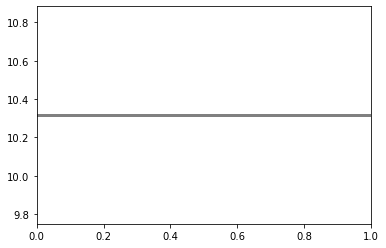

In [120]:
#Colours - Choose the extreme colours of the colour map
colors_high = ["#ff5a5f", "#c81d25"] # Extreme colours of the high scale
colors_low = ["#2196f3","#bbdefb"] # Extreme colours of the low scale

# Colormap - Build the colour maps
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(below_average['ArrDelay'].min(), average) # linearly normalizes data into the [0.0, 1.0] interval
norm_high = mpl.colors.Normalize(average, above_average['ArrDelay'].max())

# Plot bars and average (horizontal) line
bar1 = ax.bar(below_average['Month'], below_average['ArrDelay'], color=cmap_low(norm_low(below_average['ArrDelay'])), width=0.6, label='Below Average', zorder=2)
bar2 = ax.bar(above_average['Month'], above_average['ArrDelay'], color=cmap_high(norm_high(above_average['ArrDelay'])), width=0.6, label='Above Average', zorder=2)
plt.axhline(y=average, color = 'grey', linewidth=3)

# Determine the y-limits of the plot
ymin, ymax = ax.get_ylim()
# Calculate a suitable y position for the text label
y_pos = average/ymax + 0.03
# Annotate the average line
ax.text(0.88, y_pos, f'Average = {average:.1f}', ha='right', va='center', transform=ax.transAxes, size=8, zorder=3)

# Add legend
ax.legend(loc="best", ncol=2, bbox_to_anchor=[1, 1.07], borderaxespad=0, frameon=False, fontsize=8)

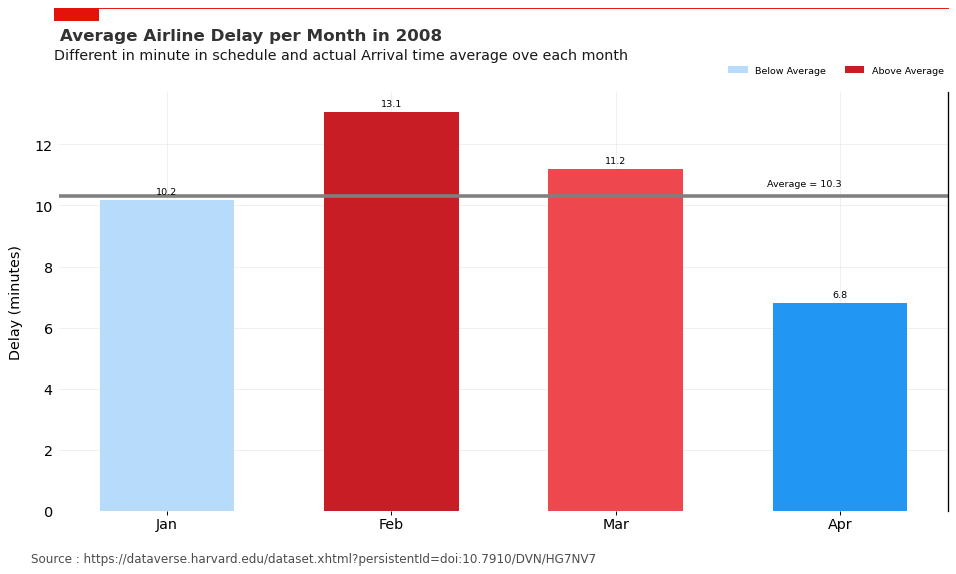

In [123]:
# Colors - choose the extream colors of the map
colours = ['#2196f3','#bbdefb']

# colormap = Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("color_map",colours, N= 256)
norm = mpl.colors.Normalize(delay_by_month['ArrDelay'].min(),delay_by_month['ArrDelay'].max())

fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
bar1 = ax.bar(delay_by_month["Month"],delay_by_month["ArrDelay"],width = 0.6, 
              color = cmap(norm(delay_by_month['ArrDelay'])),zorder = 2)
# creating grid
ax.grid(which = 'major',axis = 'x', color ='#DAD8D7',alpha = 0.4, zorder = 1) # 'alpha' is the intensity of the grid lines
ax.grid(which = 'major',axis = 'y', color ='#DAD8D7',alpha = 0.4, zorder = 1)

# Reformat x-axix label and tick labels
ax.set_xlabel('',fontsize = 12,labelpad = 10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_major_formatter(lambda s, i: f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
ax.xaxis.set_tick_params(pad = 2,labelbottom = True, bottom = True,labelsize= 12, labelrotation = 0 )# 'pad' is the distace between the parameters and axis
labels = ['Jan','Feb','Mar','Apr']
ax.set_xticks(delay_by_month["Month"],labels) # Map integer numbers from the series to labels list

# Reformat y-axix label and tick labels
ax.set_ylabel('Delay (minutes)',fontsize = 12,labelpad = 10)
ax.yaxis.set_label_position('left')
ax.yaxis.set_major_formatter(lambda s, i: f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
ax.yaxis.set_tick_params(pad = 2,labeltop = False ,labelbottom = True, bottom = False,labelsize= 12, labelrotation = 0 )

# Add label on top of each bar
ax.bar_label(bar1,labels= [f'{e:,.1f}' for e in delay_by_month['ArrDelay']], padding=3, color = 'black',fontsize=8)




# Remove the spines
ax.spines[['top','bottom','left']].set_visible(False)

#Make the right so=pines more thick
ax.spines['right'].set_linewidth(1.1)

# Add redline and rectangle on top of the figure
ax.plot([0.12,0.9],[0.98,0.98],transform = fig.transFigure, clip_on = False, color = '#E3120B',linewidth = 0.8)
ax.add_patch(plt.Rectangle((0.12,0.98),0.04,-0.02, facecolor = '#E3120B',transform = fig.transFigure,
                           clip_on = False, linewidth = 0))

# Add in title and sub title
ax.text(x = 0.12, y = 0.93, s = " Average Airline Delay per Month in 2008", transform = fig.transFigure,
        ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = "Different in minute in schedule and actual Arrival time average ove each month",
        transform = fig.transFigure,ha = 'left', fontsize = 12, alpha = 0.9)

# Set source of the figure
plt.text(x = 0.1, y = 0.12, s = 'Source : https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7',
        transform = fig.transFigure, ha = 'left',fontsize = 10, alpha = 0.7)

# Adjust the margins arround the plot area
plt.subplots_adjust(left = None, bottom = 0.2,right = None, top = 0.85, wspace=None, hspace= None )

# Set a white background
fig.patch.set_facecolor('white')

#Colours - Choose the extreme colours of the colour map
colors_high = ["#ff5a5f", "#c81d25"] # Extreme colours of the high scale
colors_low = ["#2196f3","#bbdefb"] # Extreme colours of the low scale

# Colormap - Build the colour maps
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(below_average['ArrDelay'].min(), average) # linearly normalizes data into the [0.0, 1.0] interval
norm_high = mpl.colors.Normalize(average, above_average['ArrDelay'].max())

# Plot bars and average (horizontal) line
bar1 = ax.bar(below_average['Month'], below_average['ArrDelay'], color=cmap_low(norm_low(below_average['ArrDelay'])), width=0.6, label='Below Average', zorder=2)
bar2 = ax.bar(above_average['Month'], above_average['ArrDelay'], color=cmap_high(norm_high(above_average['ArrDelay'])), width=0.6, label='Above Average', zorder=2)
plt.axhline(y=average, color = 'grey', linewidth=3)

# Determine the y-limits of the plot
ymin, ymax = ax.get_ylim()
# Calculate a suitable y position for the text label
y_pos = average/ymax + 0.03
# Annotate the average line
ax.text(0.88, y_pos, f'Average = {average:.1f}', ha='right', va='center', transform=ax.transAxes, size=8, zorder=3)

# Add legend
ax.legend(loc="best", ncol=2, bbox_to_anchor=[1, 1.07], borderaxespad=0, frameon=False, fontsize=8)